In [31]:
# Source: http://www.hs.uni-hamburg.de/DE/Ins/Per/Czesla/PyA/PyA/pyaslDoc/aslDoc/outlier.html

from __future__ import print_function, division
import numpy as np
import matplotlib.pylab as plt
from PyAstronomy import pyasl

In [32]:
# Convert data given at:
# http://www.itl.nist.gov/div898/handbook/eda/section3/eda35h3.htm
# to array.
# data from source material
x = np.array([float(x) for x in "-0.25 0.68 0.94 1.15 1.20 1.26 1.26 1.34 1.38 1.43 \
                                  1.49 1.49 1.55 1.56 1.58 1.65 1.69 1.70 1.76 1.77 \
                                  1.81 1.91 1.94 1.96 1.99 2.06 2.09 2.10 2.14 2.15 \
                                  2.23 2.24 2.26 2.35 2.37 2.40 2.47 2.54 2.62 2.64 \
                                  2.90 2.92 2.92 2.93 3.21 3.26 3.30 3.59 3.68 4.30 \
                                  4.64 5.34 5.42 6.01".split()])

# data from matlab lib test
x2 = np.array([float(x) for x in "2.1 2.6 2.4 2.5 2.3 2.1 2.3 2.6 8.2 8.3".split()])

# data from sensor 3 at 45cm (coleta 2)
x3 = np.array([float(x) for x in "21.22 13.928 685.87 3.982".split()]) # 1
# x3 = np.array([float(x) for x in "22.822 6.0812 580.73 4.3211".split()]) # 23
# x3 = np.array([float(x) for x in "22.67 19.875 20.284 4.6661".split()]) # 102

In [46]:
x4 = np.matrix('21.22 13.928 685.87 3.982; \
21.74 11.437 11.695 3.9703; \
21.968 9.648 11.595 4.0697; \
22.243 8.1979 11.32 4.0288; \
22.424 7.1863 11.192 3.9528; \
22.535 6.5723 10.94 3.9937; \
22.594 6.3443 10.823 4.0112; \
22.652 6.1104 10.636 3.9235; \
22.816 6.0929 40.908 3.982; \
22.711 5.9408 22.682 4.0346; \
22.711 5.9701 10.163 3.982; \
22.705 6.0402 10.005 4.0463; \
22.652 5.9408 9.993 4.0463; \
22.594 5.9818 9.8819 4.0814; \
22.763 5.9701 9.7766 4.1048; \
22.646 5.9584 9.7123 4.1165; \
22.705 6.1221 9.6597 4.1633; \
22.53 6.1221 9.5895 4.2159; \
22.477 6.1396 9.5486 4.2276; \
22.477 6.1513 9.5311 4.2276; \
22.588 6.1806 9.5778 4.2627; \
22.769 6.163 109.42 4.3328; \
22.822 6.0812 580.73 4.3211; \
22.933 6.0929 592.49 4.3094; \
23.231 6.1104 627.45 4.3621; \
23.179 6.1747 9.3322 4.3211; \
23.529 6.2449 9.303 4.2744; \
23.711 6.4905 9.227 4.2744; \
23.833 6.6776 9.1919 4.2744; \
23.892 6.8062 9.1451 4.2334; \
24.015 7.0577 9.0574 4.2334; \
23.529 7.3091 9.0048 4.2159; \
23.471 7.5664 8.999 4.175; \
23.407 7.8704 8.9112 4.2276; \
23.29 8.1803 8.9522 4.1866; \
23.167 8.385 8.9405 4.2393; \
23.044 8.5136 8.9405 4.2451; \
22.939 8.7066 8.9112 4.2451; \
22.699 8.9639 8.9112 4.2744; \
22.635 9.1159 8.9522 4.2568; \
22.641 9.2679 8.9814 4.2568; \
22.699 9.4024 8.9405 4.3387; \
22.752 9.5369 8.9931 4.3679; \
22.804 9.7357 9.0633 4.3679; \
22.705 9.8527 9.0808 4.4498; \
22.699 9.7649 9.0925 4.4147; \
23.05 9.5427 9.1334 4.5082; \
23.167 9.5018 9.1451 4.4439; \
23.161 9.4784 9.1451 4.4966; \
23.342 9.6071 9.1685 4.5258; \
23.459 9.6305 9.151 4.4849; \
23.231 9.7416 9.1568 4.4322; \
23.114 9.876 9.1334 4.3855; \
23.348 9.7883 9.1334 4.4322; \
23.22 10.011 9.1042 4.3562; \
22.915 10.449 9.0808 4.3504; \
22.559 10.759 9.075 4.3094; \
22.442 11.045 9.1042 4.2159; \
21.945 11.238 9.0808 4.3211; \
21.717 11.513 9.0984 4.2802; \
21.658 11.548 9.1451 4.2393; \
21.705 12.116 9.2387 4.2919; \
21.635 12.268 9.227 4.3445; \
21.688 12.607 9.3206 4.3036; \
21.588 12.765 9.3498 4.3504; \
21.547 12.998 9.42 4.403; \
21.477 13.273 9.4901 4.4849; \
21.477 13.431 9.5544 4.4556; \
21.711 13.636 9.6071 4.4849; \
21.816 13.595 9.6772 4.555; \
22.05 13.513 9.7591 4.5433; \
22.278 13.694 9.7766 4.5726; \
22.389 13.805 9.8117 4.6077; \
22.29 14.104 9.8643 4.6018; \
22.348 14.384 9.841 4.6077; \
22.693 14.419 9.841 4.5609; \
22.752 14.794 9.8117 4.5199; \
22.74 15.139 9.8176 4.5199; \
22.606 15.595 9.8234 4.4381; \
22.261 15.501 9.7766 4.3796; \
22.05 15.782 9.7942 4.3504; \
21.635 15.846 9.8059 4.3504; \
21.506 16.016 9.8527 4.3153; \
21.454 16.367 9.8527 4.3621; \
21.348 16.495 9.8877 4.3738; \
21.243 16.589 9.9696 4.3855; \
21.237 16.723 10.011 4.4381; \
21.191 16.618 10.046 4.4907; \
20.974 17.197 10.139 4.4498; \
21.085 16.957 10.239 4.5024; \
21.185 17.489 10.25 4.555; \
21.243 17.782 10.32 4.5784; \
21.424 17.659 10.484 4.5726; \
21.541 17.589 10.525 4.6369; \
21.629 17.7 28.196 4.6603; \
21.822 17.934 14.449 4.6369; \
21.752 18.331 12.56 4.7071; \
21.927 18.366 14.49 4.7071; \
22.261 18.77 17.021 4.7071; \
22.378 19.191 18.436 4.7071; \
22.547 19.501 19.413 4.7187; \
22.67 19.875 20.284 4.6661; \
22.401 20.12 21.278 4.6778; \
22.249 20.483 22.003 4.5784; \
22.138 21.161 22.483 4.5433; \
22.249 20.957 22.845 4.555; \
22.138 21.424 23.132 4.6018; \
22.021 21.541 23.296 4.5609; \
21.962 21.664 23.395 4.6135; \
21.951 21.53 23.348 4.6252; \
21.74 22.003 23.307 4.6252; \
21.793 22.179 23.255 4.6778; \
22.021 22.296 23.266 4.7304; \
22.021 22.413 23.085 4.7304; \
22.132 22.53 23.032 4.7421; \
22.138 22.646 23.097 4.8357; \
22.266 22.898 22.997 4.8942; \
22.465 22.67 22.839 4.9234; \
22.57 22.372 22.717 4.9; \
22.816 22.67 22.541 4.9585')
# print(x)

def myfunction( x ):
#     print(x)
    return sum(x)

def detectOutlier( data ):
    r = pyasl.generalizedESD(data, 3, 6.5, fullOutput=True)
    print("Number of outliers: ", r[0])
    print("Indices of outliers: ", r[1])

# print(np.apply_along_axis( myfunction, axis=1, arr=x ))
# detectOutlier(x3)
# r = pyasl.generalizedESD(x, 3, 0.05, fullOutput=True)

print(np.apply_along_axis( detectOutlier, axis=1, arr=x4 ))

Number of outliers:  1
Indices of outliers:  [2]


TypeError: object of type 'NoneType' has no len()

In [33]:
# Apply the generalized ESD
r = pyasl.generalizedESD(x, 3, 6.5, fullOutput=True)

print("Number of outliers: ", r[0])
print("Indices of outliers: ", r[1])
print("        R      Lambda")
for i in range(len(r[2])):
  print("%2d  %8.5f  %8.5f" % ((i+1), r[2][i], r[3][i]))

Number of outliers:  3
Indices of outliers:  [53, 52, 51]
        R      Lambda
 1   3.14819   3.15879
 2   2.97114   3.15143
 3   3.21044   3.14389


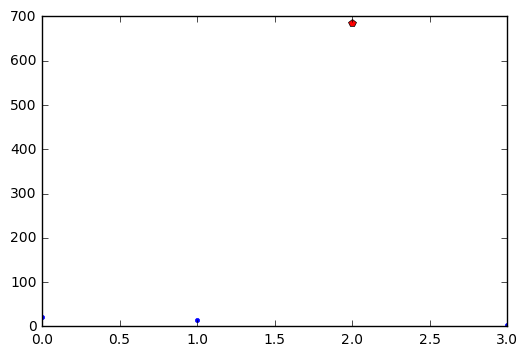

In [61]:
# Plot the "data"
plt.plot(x3, 'b.')
# and mark the outliers.
for i in range(r[0]):
  plt.plot(r[1][i], x3[r[1][i]], 'rp')
plt.show()